# Abstract
This is a report about predict the price of the King County House, the dataset comes from kaggle competiiton platform, I will use both Classification and Regression problem to get the conclusion. One important way of processing the data is use the one-hot encoding, it is very convient when I want analysis the dataset with not very big noise inside. With classification problem, I will separate the price into two parts(binary classification) and I will create Random Forest classifier, XGBoost classifier, Logistic Regression classifier. The base model will be created and through tuning the hyper parameters inside the model we will find out that the AUC value increases. The regression problem I will create regressors of those supervised learning. And I will check the RMSE and accuracy of the model then compare them. In the last part, I used another supervised learning: GBM. And also apply it to Classificatio and Regression. The conclusion is: GBM algorithm wins in classification and xGBoost wins in regression.


## Approach
Algorithms used.

    For Part A:
       Bagging Algo : Random Forest Classifier
       Boosting Algo : XGBoost Classifier
    For Part B:
       Logistic Regression
    For Part C:
       Bagging Algo : Random Forest Regressor
       Boosting Algo : XGBoost Regressor
    For Part D:
    For Part E:
       GBM Algo: GBM Classifier
       GBM Algo: GBM Regressor

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from pandas import Series
%matplotlib inline

Read in the raw data from local

In [2]:
features = pd.read_csv('king_county_cleansed.csv')

In [3]:
features.head(5)

,index,price,bedrooms,bathrooms,sqft_living,sqft_lot,waterfront,sqft_above,sqft_basement,yr_built,...,grade#10,grade#11,grade#12,grade#13,zipcode#98004,zipcode#98102,zipcode#98109,zipcode#98112,zipcode#98039,zipcode#98040
0,16768,437500,3,2.25,1970,35100,0,1970,0,1977,...,0,0,0,0,0,0,0,0,0,0
1,9596,790000,3,2.50,2600,4750,0,1700,900,1951,...,0,0,0,0,0,0,0,0,0,0
2,9587,675000,5,2.50,2820,67518,0,2820,0,1979,...,0,0,0,0,0,0,0,0,0,0
3,20602,555000,4,2.50,3310,6500,0,3310,0,2012,...,0,0,0,0,0,0,0,0,0,0
4,11577,440000,4,2.25,2160,8119,0,1080,1080,1966,...,0,0,0,0,0,0,0,0,0,0


Look at the description of dataset.

In [4]:
features.describe()

,index,price,bedrooms,bathrooms,sqft_living,sqft_lot,waterfront,sqft_above,sqft_basement,yr_built,...,grade#10,grade#11,grade#12,grade#13,zipcode#98004,zipcode#98102,zipcode#98109,zipcode#98112,zipcode#98039,zipcode#98040
count,21613.00000,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,...,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,10806.00000,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,0.007542,1788.390691,291.509045,1971.005136,...,0.052468,0.018461,0.004164,0.000601,0.014667,0.004858,0.005043,0.012446,0.002313,0.013048
std,6239.28002,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.086517,828.090978,442.575043,29.373411,...,0.222975,0.134615,0.064397,0.024518,0.120219,0.069533,0.070838,0.110869,0.048043,0.113482
min,0.00000,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,0.000000,290.000000,0.000000,1900.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5403.00000,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,0.000000,1190.000000,0.000000,1951.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,10806.00000,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,0.000000,1560.000000,0.000000,1975.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,16209.00000,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,0.000000,2210.000000,560.000000,1997.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,21612.00000,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,1.000000,9410.000000,4820.000000,2015.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Draw a heatmap

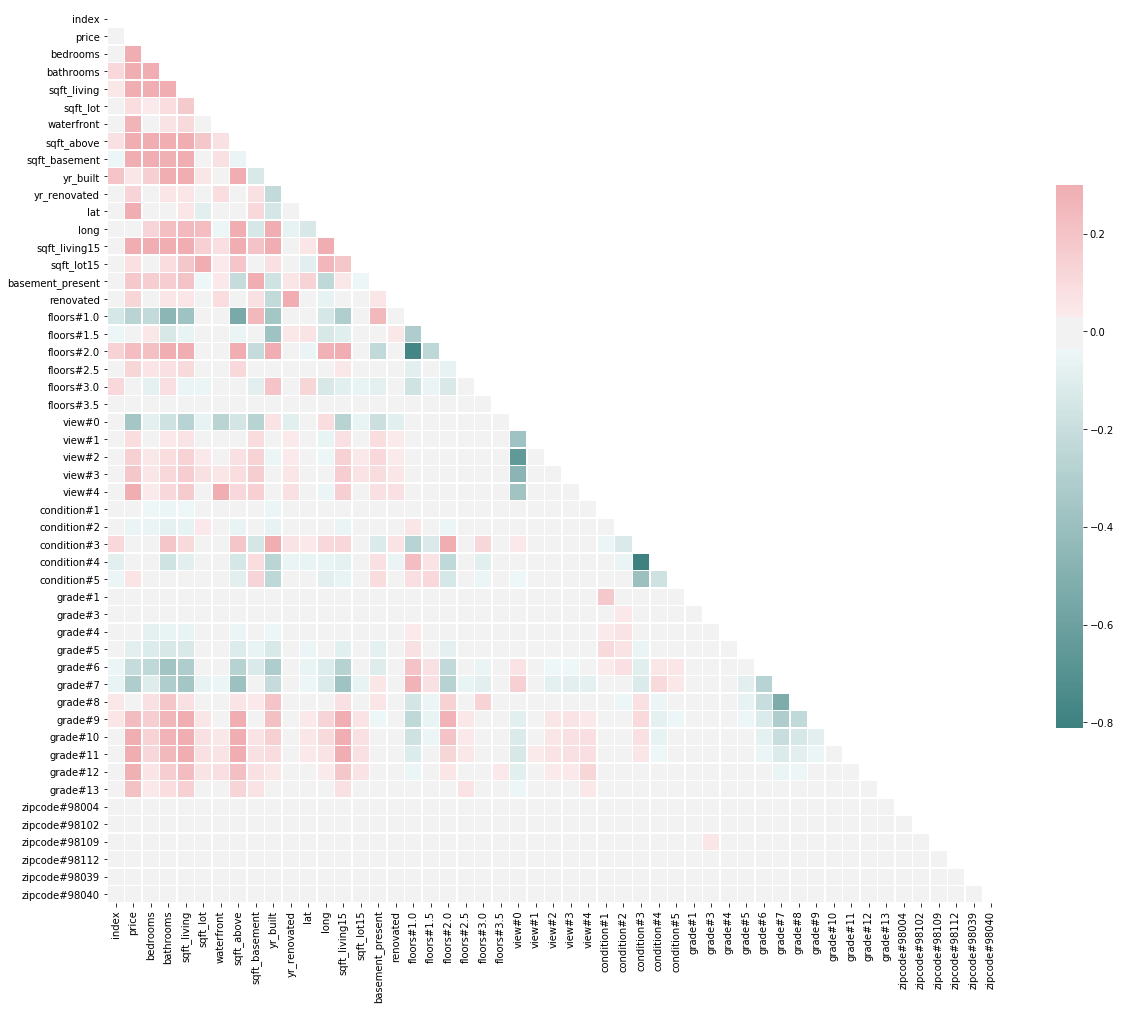

In [5]:
corr = features.corr()

mask = np.zeros_like(corr, dtype=np.bool) #Return an array of zeros with the same shape and type as a given array
mask[np.triu_indices_from(mask)] = True  #Return the indices for the upper-triangle of arr.



f, ax = plt.subplots(figsize = (20, 20)) #define the scale of the plot

camp = sns.diverging_palette(190, 10, as_cmap=True)  #define the color of the heatmap

sns.heatmap(corr, mask=mask, cmap=camp, vmax=.3, center=0, square = True, linewidths = .5, cbar_kws = {'shrink': .5})

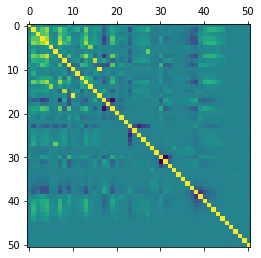

In [6]:
plt.matshow(features.corr())  #Display an array as a matrix in a new figure window.

In [7]:
median_price = features.loc[:,'price'].median() #Count the median of the 'price' column.
print(median_price) #print out

450000.0


### Add a column called price_cat if the value is larger than the median, equals 1, if not equals -1

In [8]:
features['price_cat'] = features['price'].apply(lambda x: 1 if x > median_price else -1)

In [9]:
features[['price', 'price_cat']].head(10)  #check the first ten rows after creating a column

,price,price_cat
0,437500,-1
1,790000,1
2,675000,1
3,555000,1
4,440000,-1
5,295000,-1
6,470000,1
7,550000,1
8,313000,-1
9,626000,1


In [10]:
features.head(5)

,index,price,bedrooms,bathrooms,sqft_living,sqft_lot,waterfront,sqft_above,sqft_basement,yr_built,...,grade#11,grade#12,grade#13,zipcode#98004,zipcode#98102,zipcode#98109,zipcode#98112,zipcode#98039,zipcode#98040,price_cat
0,16768,437500,3,2.25,1970,35100,0,1970,0,1977,...,0,0,0,0,0,0,0,0,0,-1
1,9596,790000,3,2.50,2600,4750,0,1700,900,1951,...,0,0,0,0,0,0,0,0,0,1
2,9587,675000,5,2.50,2820,67518,0,2820,0,1979,...,0,0,0,0,0,0,0,0,0,1
3,20602,555000,4,2.50,3310,6500,0,3310,0,2012,...,0,0,0,0,0,0,0,0,0,1
4,11577,440000,4,2.25,2160,8119,0,1080,1080,1966,...,0,0,0,0,0,0,0,0,0,-1


# Part A

## Random Forest Classifier

In [11]:
from sklearn.model_selection import train_test_split #import method to split the dataset into train and test

In [12]:
features.columns #check the columns in the dataset.

Index(['index', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'waterfront', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated',
       'lat', 'long', 'sqft_living15', 'sqft_lot15', 'basement_present',
       'renovated', 'floors#1.0', 'floors#1.5', 'floors#2.0', 'floors#2.5',
       'floors#3.0', 'floors#3.5', 'view#0', 'view#1', 'view#2', 'view#3',
       'view#4', 'condition#1', 'condition#2', 'condition#3', 'condition#4',
       'condition#5', 'grade#1', 'grade#3', 'grade#4', 'grade#5', 'grade#6',
       'grade#7', 'grade#8', 'grade#9', 'grade#10', 'grade#11', 'grade#12',
       'grade#13', 'zipcode#98004', 'zipcode#98102', 'zipcode#98109',
       'zipcode#98112', 'zipcode#98039', 'zipcode#98040', 'price_cat'],
      dtype='object')

## Select features and split data into train and test

In [13]:
X_features = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'waterfront', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated',
       'lat', 'long', 'sqft_living15', 'sqft_lot15', 'basement_present',
       'renovated', 'floors#1.0', 'floors#1.5', 'floors#2.0', 'floors#2.5',
       'floors#3.0', 'floors#3.5', 'view#0', 'view#1', 'view#2', 'view#3',
       'view#4', 'condition#1', 'condition#2', 'condition#3', 'condition#4',
       'condition#5', 'grade#1', 'grade#3', 'grade#4', 'grade#5', 'grade#6',
       'grade#7', 'grade#8', 'grade#9', 'grade#10', 'grade#11', 'grade#12',
       'grade#13', 'zipcode#98004', 'zipcode#98102', 'zipcode#98109',
       'zipcode#98112', 'zipcode#98039', 'zipcode#98040']

#Select features for X.
X = features[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'waterfront', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated',
       'lat', 'long', 'sqft_living15', 'sqft_lot15', 'basement_present',
       'renovated', 'floors#1.0', 'floors#1.5', 'floors#2.0', 'floors#2.5',
       'floors#3.0', 'floors#3.5', 'view#0', 'view#1', 'view#2', 'view#3',
       'view#4', 'condition#1', 'condition#2', 'condition#3', 'condition#4',
       'condition#5', 'grade#1', 'grade#3', 'grade#4', 'grade#5', 'grade#6',
       'grade#7', 'grade#8', 'grade#9', 'grade#10', 'grade#11', 'grade#12',
       'grade#13', 'zipcode#98004', 'zipcode#98102', 'zipcode#98109',
       'zipcode#98112', 'zipcode#98039', 'zipcode#98040']]

#Select 'price_cat' as labels
y = features['price_cat']

#split the dataset into training set and test set, 70% training and 30% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3) 

In [14]:
#Import RandomForest Classifier
from sklearn.ensemble import RandomForestClassifier

#Define an object of RF classifier
clf = RandomForestClassifier(n_estimators = 100) #use 100 Decision trees in the RF model.

#Train the model using training sets.
clf.fit(X_train, y_train)

#Predict the answer of test data.
y_pred = clf.predict(X_test)

/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [15]:
#Import scikit_learn metrics module for accuracy calculation
from sklearn import metrics

#Look at the hyperparameters and their default number of the classifier.
RandomForestClassifier(criterion='gini', max_depth=None, 
                       min_samples_split=2, min_samples_leaf=1, 
                       min_weight_fraction_leaf=0.0, max_features='auto', 
                       max_leaf_nodes=None, min_impurity_decrease=0.0, 
                       min_impurity_split=None, bootstrap=True, oob_score=False, 
                       n_jobs=1, random_state=None, verbose=0, 
                       warm_start=False, class_weight=None)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

## Take a look at the importance of features.

In Random Forest, the way RF solve the importance is ∑(error2-error1)/Ktree
error1 is based on the oob_score error, and add noise error in oob_score, it will get another error2.
The difference between error2 and error1 will be error2 - error1, then divided by Ktree.

In [16]:
feature_imp = pd.Series(clf.feature_importances_, index=X_features).sort_values(ascending = False) 
feature_imp    #Create a series shows the importance number of features and sort.

lat                 2.709002e-01
sqft_living         1.178592e-01
sqft_above          8.826640e-02
sqft_living15       8.750884e-02
long                5.649259e-02
sqft_lot15          5.260054e-02
yr_built            4.759100e-02
sqft_lot            4.633552e-02
bathrooms           3.843016e-02
grade#7             2.880388e-02
sqft_basement       2.692527e-02
bedrooms            1.919291e-02
grade#9             1.821891e-02
grade#8             1.398187e-02
grade#6             1.150741e-02
basement_present    1.097748e-02
view#0              8.396040e-03
floors#1.0          6.943638e-03
condition#3         5.968004e-03
grade#10            5.861245e-03
floors#2.0          5.709274e-03
condition#4         4.398691e-03
floors#1.5          4.006181e-03
condition#5         3.247436e-03
yr_renovated        3.007930e-03
view#2              1.955426e-03
renovated           1.862834e-03
view#4              1.317211e-03
zipcode#98004       1.291729e-03
view#3              1.240386e-03
floors#3.0

In [17]:
top_features = feature_imp.head(10) #Extract 10 highest features are most important
top_features

lat              0.270900
sqft_living      0.117859
sqft_above       0.088266
sqft_living15    0.087509
long             0.056493
sqft_lot15       0.052601
yr_built         0.047591
sqft_lot         0.046336
bathrooms        0.038430
grade#7          0.028804
dtype: float64

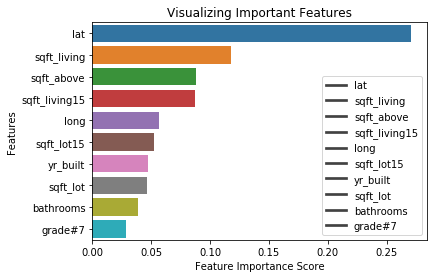

In [18]:
# Creating a bar plot
sns.barplot(x=top_features, y=top_features.index) #X-axis will be the number of importance
                                                 #Y-axis will be name of variable.
plt.xlabel('Feature Importance Score')  #Add labels to the graph
plt.ylabel('Features')
plt.title('Visualizing Important Features')
plt.legend(list(top_features.index))  #add lengend of all top features.
plt.show()

In [19]:
from pprint import pprint  #pprint is a way print things in a better format.

In [20]:
# Look at the parameters used by current model.
print('Parameters currenly in use:\n')
pprint(clf.get_params())

Parameters currenly in use:

{'bootstrap': True,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': 1,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}


### Use RandomSearchCV and GridSearchCV to tune important hyper-parameters:

In [21]:
from sklearn.model_selection import RandomizedSearchCV  #import RandomizedSearchCV library

In [22]:
# Number of decision trees in the model.
n_estimators = [int(x) for x in np.linspace(start=10, stop=200, num=5)] #Select  5 numbers from 10 to 200.
# Number of features to be considered at every split 
max_features = ['auto','sqrt'] #[max_features] is the size of the random 
# Maximum number of levels in tree                          # subsets of features to consider when splitting a node.
max_depth = [int(x) for x in np.linspace(2, 10, num=5)]   
max_depth.append(None)   # add default condition: the split of the tree will stop until every leaf has a category.
# Minimum number of samples required to split a node
min_samples_split = [5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [2, 4]
# Whether use bootstrap to select features
#bootstrap = [True, False]

# Create a dictionary to include the hyperparameter and their range.
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth' : max_depth,
               'min_samples_split' : min_samples_split,
               'min_samples_leaf' : min_samples_leaf}

# And print the dictionary:
pprint(random_grid)

{'max_depth': [2, 4, 6, 8, 10, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [2, 4],
 'min_samples_split': [5, 10],
 'n_estimators': [10, 57, 105, 152, 200]}


### Use the randomgrid to search for the best hyperparameters: 

In [23]:
#First, create a base model:
clf_base = RandomForestClassifier()
#Random search of parameters
#Use 100 different combinations, and use all available cores
clf_random = RandomizedSearchCV(estimator=clf_base,  #Use the base model
                                param_distributions=random_grid,  #use the dictionary created before
                                n_iter=100,    #100 different combinations
                                cv = 3,       # 3 fold cross validations 
                                verbose=2,     
                                random_state=42,   # never shuffle the data
                                n_jobs = -1)     #Use parallel process, -1 means the number of parallel will be the same as computer cores.
#Fit the random search model
clf_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits
[CV] n_estimators=200, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=2 
[CV] n_estimators=200, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=2 
[CV] n_estimators=200, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=2 
[CV] n_estimators=57, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=2 
[CV] n_estimators=57, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=2 
[CV] n_estimators=57, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=2 
[CV] n_estimators=152, min_samples_split=5, min_samples_leaf=4, max_features=auto, max_depth=6 
[CV] n_estimators=152, min_samples_split=5, min_samples_leaf=4, max_features=auto, max_depth=6 
[CV]  n_estimators=57, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=2, total=   0.6s
[CV]  n_estimators=57, min_samples_split=10, min_samples_l

[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    7.3s


[CV]  n_estimators=152, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=None, total=   2.9s
[CV] n_estimators=200, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=6 
[CV]  n_estimators=152, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=None, total=   3.0s
[CV] n_estimators=200, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=6 
[CV]  n_estimators=152, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=8, total=   2.1s
[CV] n_estimators=200, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=6 
[CV]  n_estimators=152, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=8, total=   2.1s
[CV]  n_estimators=57, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=None, total=   1.1s
[CV] n_estimators=152, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=10 
[CV] n_estimators=152, min_samples_split=10, min_s

[CV]  n_estimators=10, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=2, total=   0.1s
[CV]  n_estimators=10, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=2, total=   0.1s
[CV] n_estimators=10, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=8 
[CV] n_estimators=10, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=8 
[CV] n_estimators=10, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=8 
[CV]  n_estimators=10, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=8, total=   0.2s
[CV]  n_estimators=10, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=8, total=   0.1s
[CV]  n_estimators=10, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=8, total=   0.2s
[CV] n_estimators=10, min_samples_split=5, min_samples_leaf=4, max_features=auto, max_depth=2 
[CV] n_estimators=10, min_samples_split=5, min_samples_leaf=4, max_fea

[CV]  n_estimators=10, min_samples_split=10, min_samples_leaf=4, max_features=auto, max_depth=4, total=   0.1s
[CV] n_estimators=200, min_samples_split=10, min_samples_leaf=4, max_features=sqrt, max_depth=4 
[CV]  n_estimators=200, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=4, total=   1.8s
[CV] n_estimators=200, min_samples_split=10, min_samples_leaf=4, max_features=sqrt, max_depth=4 
[CV]  n_estimators=105, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=10, total=   1.8s
[CV] n_estimators=10, min_samples_split=10, min_samples_leaf=4, max_features=auto, max_depth=10 
[CV]  n_estimators=200, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=4, total=   1.8s
[CV] n_estimators=10, min_samples_split=10, min_samples_leaf=4, max_features=auto, max_depth=10 
[CV]  n_estimators=200, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=4, total=   1.9s
[CV] n_estimators=10, min_samples_split=10, min_sampl

[CV] n_estimators=57, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   25.2s


[CV]  n_estimators=57, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=10, total=   0.9s
[CV] n_estimators=57, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=10 
[CV]  n_estimators=57, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=10, total=   0.9s
[CV] n_estimators=105, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=None 
[CV]  n_estimators=57, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=10, total=   0.9s
[CV] n_estimators=105, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=None 
[CV]  n_estimators=200, min_samples_split=10, min_samples_leaf=4, max_features=auto, max_depth=8, total=   2.8s
[CV]  n_estimators=200, min_samples_split=10, min_samples_leaf=4, max_features=auto, max_depth=8, total=   2.8s
[CV] n_estimators=105, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=None 
[CV] n_estimators=152, min_samples_split=5,

[CV] n_estimators=57, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=6 
[CV]  n_estimators=57, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=8, total=   0.9s
[CV] n_estimators=152, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=4 
[CV]  n_estimators=57, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=6, total=   0.7s
[CV] n_estimators=152, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=4 
[CV]  n_estimators=105, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=4, total=   1.0s
[CV] n_estimators=152, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=4 
[CV]  n_estimators=105, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=4, total=   1.0s
[CV] n_estimators=152, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=6 
[CV]  n_estimators=105, min_samples_split=10, min_samples_leaf=2, max_fe

[CV]  n_estimators=57, min_samples_split=10, min_samples_leaf=4, max_features=auto, max_depth=4, total=   0.5s
[CV] n_estimators=200, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=10 
[CV]  n_estimators=105, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=6, total=   1.3s
[CV]  n_estimators=105, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=6, total=   1.3s
[CV] n_estimators=200, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=10 
[CV] n_estimators=200, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=10 
[CV]  n_estimators=105, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=6, total=   1.3s
[CV] n_estimators=200, min_samples_split=10, min_samples_leaf=4, max_features=sqrt, max_depth=8 
[CV]  n_estimators=57, min_samples_split=10, min_samples_leaf=4, max_features=auto, max_depth=4, total=   0.6s
[CV] n_estimators=200, min_samples_split=10, min_samples_

[CV] n_estimators=152, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=8 
[CV]  n_estimators=152, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=2, total=   0.9s
[CV] n_estimators=152, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=8 
[CV]  n_estimators=105, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=4, total=   1.0s
[CV] n_estimators=152, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=8 
[CV]  n_estimators=105, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=4, total=   1.0s
[CV] n_estimators=57, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=10 
[CV]  n_estimators=105, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=4, total=   1.0s
[CV] n_estimators=57, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=10 
[CV]  n_estimators=57, min_samples_split=5, min_samples_leaf=2, max_feat

[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:   58.1s finished


RandomizedSearchCV(cv=3, error_score='raise',
          estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
          fit_params=None, iid=True, n_iter=100, n_jobs=-1,
          param_distributions={'n_estimators': [10, 57, 105, 152, 200], 'max_features': ['auto', 'sqrt'], 'max_depth': [2, 4, 6, 8, 10, None], 'min_samples_split': [5, 10], 'min_samples_leaf': [2, 4]},
          pre_dispatch='2*n_jobs', random_state=42, refit=True,
          return_train_score='warn', scoring=None, verbose=2)

In [24]:
#From all of the outcomes get the best one.
clf_random.best_params_

{'n_estimators': 200,
 'min_samples_split': 10,
 'min_samples_leaf': 2,
 'max_features': 'auto',
 'max_depth': None}

Evaluate the model with Roc_auc(because it is binary classification problem)

In [25]:
from sklearn.metrics import roc_curve, auc
def evaluate(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    false_positive, true_positive_rate, thresholds = roc_curve(y_test, predictions)  
    roc_auc = auc(false_positive, true_positive_rate)
    return roc_auc

In [26]:
#classifier of base model
base_model = RandomForestClassifier(n_estimators=10, random_state=42)

In [27]:
#use the classifier with best parameters we got just now
best_random = clf_random.best_estimator_

In [28]:
#print out the AUC value of base model
print('ROC for base model : ' + str(evaluate(base_model, X_train, y_train, X_test, y_test)))
#print out the AUC value of best model with best parameters.
print('ROC for best model : ' + str(evaluate(best_random, X_train, y_train, X_test, y_test)))

ROC for base model : 0.8963651591289782
ROC for best model : 0.9050628140703518


The AUC value increases after tuning the hypreparameter in Random Forest.

## Grid Search with Cross Validation

In [29]:
from sklearn.model_selection import GridSearchCV    #import GridSearchCV library
param_grid = {
    'bootstrap': [True],
    'max_features': ['auto'],
    'min_samples_leaf': [1, 2, 3],
    'min_samples_split': [3, 5, 7],
    'n_estimators': [100, 200, 2000]
}

#create base model
clf = RandomForestClassifier()

In [30]:
#Create the object of the grid search model
grid_search = GridSearchCV(estimator = clf, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
#Train the grid search model.(cross validation)
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 27 candidates, totalling 81 fits
[CV] bootstrap=True, max_features=auto, min_samples_leaf=1, min_samples_split=3, n_estimators=100 
[CV] bootstrap=True, max_features=auto, min_samples_leaf=1, min_samples_split=3, n_estimators=100 
[CV] bootstrap=True, max_features=auto, min_samples_leaf=1, min_samples_split=3, n_estimators=100 
[CV] bootstrap=True, max_features=auto, min_samples_leaf=1, min_samples_split=3, n_estimators=200 
[CV] bootstrap=True, max_features=auto, min_samples_leaf=1, min_samples_split=3, n_estimators=200 
[CV] bootstrap=True, max_features=auto, min_samples_leaf=1, min_samples_split=3, n_estimators=200 
[CV] bootstrap=True, max_features=auto, min_samples_leaf=1, min_samples_split=3, n_estimators=2000 
[CV] bootstrap=True, max_features=auto, min_samples_leaf=1, min_samples_split=3, n_estimators=2000 
[CV]  bootstrap=True, max_features=auto, min_samples_leaf=1, min_samples_split=3, n_estimators=100, total=   2.1s
[CV] bootstrap=True, max_featur

[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   52.2s


[CV]  bootstrap=True, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=2000, total=  41.9s
[CV] bootstrap=True, max_features=auto, min_samples_leaf=2, min_samples_split=3, n_estimators=2000 
[CV]  bootstrap=True, max_features=auto, min_samples_leaf=2, min_samples_split=3, n_estimators=200, total=   4.1s
[CV] bootstrap=True, max_features=auto, min_samples_leaf=2, min_samples_split=3, n_estimators=2000 
[CV]  bootstrap=True, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=2000, total=  42.3s
[CV] bootstrap=True, max_features=auto, min_samples_leaf=2, min_samples_split=3, n_estimators=2000 
[CV]  bootstrap=True, max_features=auto, min_samples_leaf=2, min_samples_split=3, n_estimators=200, total=   4.1s
[CV]  bootstrap=True, max_features=auto, min_samples_leaf=2, min_samples_split=3, n_estimators=200, total=   4.1s
[CV] bootstrap=True, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=100 
[CV] bootstrap=True, max_feat

[CV] bootstrap=True, max_features=auto, min_samples_leaf=3, min_samples_split=5, n_estimators=2000 
[CV]  bootstrap=True, max_features=auto, min_samples_leaf=2, min_samples_split=7, n_estimators=2000, total=  40.0s
[CV] bootstrap=True, max_features=auto, min_samples_leaf=3, min_samples_split=7, n_estimators=100 
[CV]  bootstrap=True, max_features=auto, min_samples_leaf=3, min_samples_split=7, n_estimators=100, total=   1.9s
[CV] bootstrap=True, max_features=auto, min_samples_leaf=3, min_samples_split=7, n_estimators=100 
[CV]  bootstrap=True, max_features=auto, min_samples_leaf=3, min_samples_split=7, n_estimators=100, total=   1.9s
[CV] bootstrap=True, max_features=auto, min_samples_leaf=3, min_samples_split=7, n_estimators=100 
[CV]  bootstrap=True, max_features=auto, min_samples_leaf=2, min_samples_split=7, n_estimators=2000, total=  40.0s
[CV] bootstrap=True, max_features=auto, min_samples_leaf=3, min_samples_split=7, n_estimators=200 
[CV]  bootstrap=True, max_features=auto, min_s

[Parallel(n_jobs=-1)]: Done  81 out of  81 | elapsed:  3.1min finished


GridSearchCV(cv=3, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'bootstrap': [True], 'max_features': ['auto'], 'min_samples_leaf': [1, 2, 3], 'min_samples_split': [3, 5, 7], 'n_estimators': [100, 200, 2000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=2)

Take a look at the best parameters after grid search

In [31]:
grid_search.best_params_

{'bootstrap': True,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 7,
 'n_estimators': 2000}

In [32]:
best_grid = grid_search.best_estimator_  #Best estimator with best hyperparameters

## Compare the value of Randomgrid and GridSearch

In [33]:
#print out the AUC value of base model
print('ROC for base model : ' + str(evaluate(base_model, X_train, y_train, X_test, y_test)))
print('ROC for best grid search model : ' + str(evaluate(best_grid,X_train, y_train, X_test, y_test)))
#print out the AUC value of best model with best parameters.
print('ROC for best model : ' + str(evaluate(best_random, X_train, y_train, X_test, y_test)))

ROC for base model : 0.8963651591289782
ROC for best grid search model : 0.908484467793513
ROC for best model : 0.9059939850768997


## Now Implement XGBoost (eXtreme Gradient Boosting)

In [34]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

In [35]:
#train the model
xgBoostClassifierModel = XGBClassifier()
xgBoostClassifierModel.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [36]:
#make predictions for test data
y_pred = xgBoostClassifierModel.predict(X_test)
predictions = [round(value) for value in y_pred]

/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [37]:
accuracy = accuracy_score(y_test, predictions)
print("Accuracy of xgBoosting classifier: %.2f%%" % (accuracy * 100.0))

Accuracy of xgBoosting classifier: 90.42%


## What are the important hyper parameters?

In [38]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold

Best: -0.215594 using {'n_estimators': 350}
-0.260521 (0.011031) with: {'n_estimators': 50}
-0.235029 (0.013024) with: {'n_estimators': 100}
-0.225584 (0.014687) with: {'n_estimators': 150}
-0.220487 (0.015430) with: {'n_estimators': 200}
-0.217784 (0.016283) with: {'n_estimators': 250}
-0.216486 (0.016341) with: {'n_estimators': 300}
-0.215594 (0.016660) with: {'n_estimators': 350}


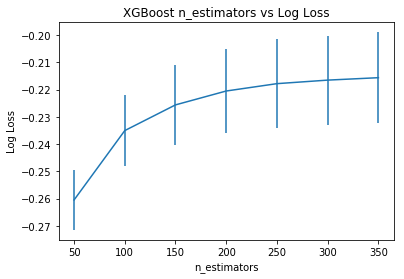

In [39]:
model = XGBClassifier()
n_estimators = range(50, 400, 50)
param_grid = dict(n_estimators=n_estimators)
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=7)
grid_search = GridSearchCV(model, param_grid, scoring="neg_log_loss", n_jobs=-1, cv=kfold)
grid_result = grid_search.fit(X_train, y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
	print("%f (%f) with: %r" % (mean, stdev, param))
# plot
plt.errorbar(n_estimators, means, yerr=stds)
plt.title("XGBoost n_estimators vs Log Loss")
plt.xlabel('n_estimators')
plt.ylabel('Log Loss')
plt.savefig('n_estimators.png')

In [40]:
model = XGBClassifier()
max_depth = range(1, 11, 2)
print(max_depth)
param_grid = dict(max_depth=max_depth)
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=7)
grid_search = GridSearchCV(model, param_grid, scoring="neg_log_loss", n_jobs=-1, cv=kfold, verbose=1)
grid_result = grid_search.fit(X_train, y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
	print("%f (%f) with: %r" % (mean, stdev, param)) 

range(1, 11, 2)
Fitting 10 folds for each of 5 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   19.0s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   36.2s finished


Best: -0.210623 using {'max_depth': 7}
-0.332458 (0.008327) with: {'max_depth': 1}
-0.235029 (0.013024) with: {'max_depth': 3}
-0.215513 (0.014394) with: {'max_depth': 5}
-0.210623 (0.017037) with: {'max_depth': 7}
-0.215306 (0.017170) with: {'max_depth': 9}


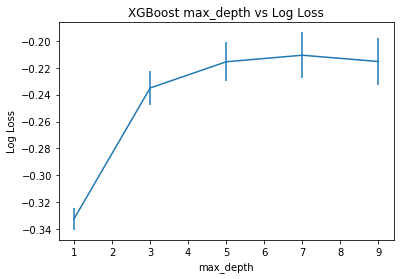

In [41]:
# plot
plt.errorbar(max_depth, means, yerr=stds)
plt.title("XGBoost max_depth vs Log Loss")
plt.xlabel('max_depth')
plt.ylabel('Log Loss')
plt.savefig('max_depth.png') 

### Tune the number of trees and max depth in xGBoost

In [42]:
# grid search
model = XGBClassifier()
n_estimators = [350, 300, 250, 400]
max_depth = [6, 7, 8, 9]
print(max_depth)
param_grid = dict(max_depth=max_depth, n_estimators=n_estimators)
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=7)
grid_search = GridSearchCV(model, param_grid, scoring="neg_log_loss", n_jobs=-1, cv=kfold, verbose=1)
grid_result = grid_search.fit(X_train, y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
	print("%f (%f) with: %r" % (mean, stdev, param))

[6, 7, 8, 9]
Fitting 10 folds for each of 16 candidates, totalling 160 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 160 out of 160 | elapsed:  9.1min finished


Best: -0.213283 using {'max_depth': 6, 'n_estimators': 250}
-0.217842 (0.018354) with: {'max_depth': 6, 'n_estimators': 350}
-0.215355 (0.017912) with: {'max_depth': 6, 'n_estimators': 300}
-0.213283 (0.017847) with: {'max_depth': 6, 'n_estimators': 250}
-0.220004 (0.018993) with: {'max_depth': 6, 'n_estimators': 400}
-0.223378 (0.020598) with: {'max_depth': 7, 'n_estimators': 350}
-0.219979 (0.020175) with: {'max_depth': 7, 'n_estimators': 300}
-0.216566 (0.019664) with: {'max_depth': 7, 'n_estimators': 250}
-0.227351 (0.021614) with: {'max_depth': 7, 'n_estimators': 400}
-0.230193 (0.020908) with: {'max_depth': 8, 'n_estimators': 350}
-0.225353 (0.020395) with: {'max_depth': 8, 'n_estimators': 300}
-0.220798 (0.019347) with: {'max_depth': 8, 'n_estimators': 250}
-0.235435 (0.021951) with: {'max_depth': 8, 'n_estimators': 400}
-0.240404 (0.021812) with: {'max_depth': 9, 'n_estimators': 350}
-0.235219 (0.021032) with: {'max_depth': 9, 'n_estimators': 300}
-0.229322 (0.020315) with: {'m

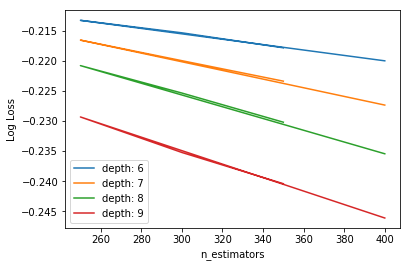

In [43]:
# plot results
scores = np.array(means).reshape(len(max_depth), len(n_estimators))
for i, value in enumerate(max_depth):
    plt.plot(n_estimators, scores[i], label='depth: ' + str(value))
plt.legend()
plt.xlabel('n_estimators')
plt.ylabel('Log Loss')
plt.savefig('n_estimators_vs_max_depth.png')

## Creating the model with the best values for Hyper parameters

In [44]:
model = XGBClassifier(max_depth=6, n_estimators=250)

In [45]:
print(model)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=6, min_child_weight=1, missing=None, n_estimators=250,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)


In [46]:
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]

/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [47]:
print('ROC for the XGBoost model is: ' + str(evaluate(model, X_train,y_train, X_test, y_test)))

ROC for the XGBoost model is: 0.914176374295721


/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


## Thus we got a higher ROC for XGBoost model than the bagging models tried earlier

## Part B:

### Classification with Logistic Regression

In [48]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
import pandas as pd
from sklearn.linear_model import LogisticRegression

In [49]:
features['price_cat_log'] = features['price'].apply(lambda x: 1 if x > median_price else 0)

In [50]:
features.columns

Index(['index', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'waterfront', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated',
       'lat', 'long', 'sqft_living15', 'sqft_lot15', 'basement_present',
       'renovated', 'floors#1.0', 'floors#1.5', 'floors#2.0', 'floors#2.5',
       'floors#3.0', 'floors#3.5', 'view#0', 'view#1', 'view#2', 'view#3',
       'view#4', 'condition#1', 'condition#2', 'condition#3', 'condition#4',
       'condition#5', 'grade#1', 'grade#3', 'grade#4', 'grade#5', 'grade#6',
       'grade#7', 'grade#8', 'grade#9', 'grade#10', 'grade#11', 'grade#12',
       'grade#13', 'zipcode#98004', 'zipcode#98102', 'zipcode#98109',
       'zipcode#98112', 'zipcode#98039', 'zipcode#98040', 'price_cat',
       'price_cat_log'],
      dtype='object')

In [51]:
price_cat_log=features['price_cat_log']
y_log=price_cat_log

In [52]:
X_train_log,X_test_log,y_train_log,y_test_log=train_test_split(features[['bedrooms', 'sqft_living', 'waterfront', 'sqft_basement', 'yr_built', 'bathrooms']]
                                                               ,y_log,test_size=0.3,random_state=0)

In [53]:
logreg=LogisticRegression().fit(X_train_log,y_train_log)
logreg
print("Training set score: {:.3f}".format(logreg.score(X_train_log,y_train_log)))
print("Test set score: {:.3f}".format(logreg.score(X_test_log,y_test_log)))

Training set score: 0.732
Test set score: 0.731


In [54]:
logit_model=sm.Logit(y_train_log,X_train_log)
result=logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.522835
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:          price_cat_log   No. Observations:                15129
Model:                          Logit   Df Residuals:                    15123
Method:                           MLE   Df Model:                            5
Date:                Tue, 29 Jan 2019   Pseudo R-squ.:                  0.2457
Time:                        17:22:25   Log-Likelihood:                -7910.0
converged:                       True   LL-Null:                       -10486.
                                        LLR p-value:                     0.000
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
bedrooms         -0.3118      0.028    -10.959      0.000      -0.368      -0.256
sqft_living       0.

### Looking at the z scores, we know that, sqft_living is the most significant followed by yr_built and then the rest.

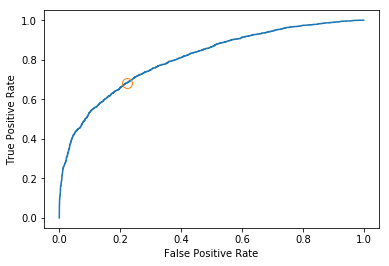

In [55]:
from sklearn.metrics import roc_curve
falsepos,truepos,thresholds=roc_curve(y_test_log,logreg.decision_function(X_test_log))

plt.plot(falsepos,truepos,label="ROC")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")

cutoff=np.argmin(np.abs(thresholds))
plt.plot(falsepos[cutoff],truepos[cutoff],'o',markersize=10,label="cutoff",fillstyle="none")
plt.show()

In [56]:
from sklearn import metrics
metrics.auc(falsepos, truepos)

0.8078695178147917

### Regression with Trees

## Part C:

### Random Forest based Regression

In [57]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(random_state = 42)
from pprint import pprint
# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(rf.get_params())

Parameters currently in use:

{'bootstrap': True,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 10,
 'n_jobs': 1,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}


In [58]:
X_features_reg = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'waterfront', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated',
       'lat', 'long', 'sqft_living15', 'sqft_lot15', 'basement_present',
       'renovated', 'floors#1.0', 'floors#1.5', 'floors#2.0', 'floors#2.5',
       'floors#3.0', 'floors#3.5', 'view#0', 'view#1', 'view#2', 'view#3',
       'view#4', 'condition#1', 'condition#2', 'condition#3', 'condition#4',
       'condition#5', 'grade#1', 'grade#3', 'grade#4', 'grade#5', 'grade#6',
       'grade#7', 'grade#8', 'grade#9', 'grade#10', 'grade#11', 'grade#12',
       'grade#13', 'zipcode#98004', 'zipcode#98102', 'zipcode#98109',
       'zipcode#98112', 'zipcode#98039', 'zipcode#98040']

X_reg=features[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'waterfront', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated',
       'lat', 'long', 'sqft_living15', 'sqft_lot15', 'basement_present',
       'renovated', 'floors#1.0', 'floors#1.5', 'floors#2.0', 'floors#2.5',
       'floors#3.0', 'floors#3.5', 'view#0', 'view#1', 'view#2', 'view#3',
       'view#4', 'condition#1', 'condition#2', 'condition#3', 'condition#4',
       'condition#5', 'grade#1', 'grade#3', 'grade#4', 'grade#5', 'grade#6',
       'grade#7', 'grade#8', 'grade#9', 'grade#10', 'grade#11', 'grade#12',
       'grade#13', 'zipcode#98004', 'zipcode#98102', 'zipcode#98109',
       'zipcode#98112', 'zipcode#98039', 'zipcode#98040']]  # Features

y_reg=features['price']  # Labels
       
# Split dataset into training set and test set
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg, y_reg, test_size=0.3) # 70% training and 30% test

### Random Search Cross Validation in Scikit-Learn

In [59]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 200, num = 5)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(2, 10, num = 5)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [2, 4]
# Method of selecting samples for training each tree
#bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}
pprint(random_grid)

{'max_depth': [2, 4, 6, 8, 10, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [2, 4],
 'min_samples_split': [5, 10],
 'n_estimators': [10, 57, 105, 152, 200]}


In [60]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train_reg, y_train_reg)

Fitting 3 folds for each of 100 candidates, totalling 300 fits
[CV] n_estimators=200, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=2 
[CV] n_estimators=200, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=2 
[CV] n_estimators=200, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=2 
[CV] n_estimators=57, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=2 
[CV] n_estimators=57, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=2 
[CV] n_estimators=57, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=2 
[CV] n_estimators=152, min_samples_split=5, min_samples_leaf=4, max_features=auto, max_depth=6 
[CV] n_estimators=152, min_samples_split=5, min_samples_leaf=4, max_features=auto, max_depth=6 
[CV]  n_estimators=200, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=2, total=   0.9s
[CV]  n_estimators=200, min_samples_split=5, min_samples_l

[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   12.4s


[CV]  n_estimators=200, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=2, total=   3.6s
[CV] n_estimators=57, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=None 
[CV]  n_estimators=10, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=4, total=   0.4s
[CV] n_estimators=57, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=None 
[CV]  n_estimators=152, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=8, total=   2.0s
[CV] n_estimators=200, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=6 
[CV]  n_estimators=152, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=8, total=   2.0s
[CV] n_estimators=200, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=6 
[CV]  n_estimators=152, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=8, total=   2.1s
[CV] n_estimators=200, min_samples_split=5, min_sample

[CV] n_estimators=57, min_samples_split=10, min_samples_leaf=4, max_features=auto, max_depth=10 
[CV]  n_estimators=152, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=10, total=  13.1s
[CV] n_estimators=57, min_samples_split=10, min_samples_leaf=4, max_features=auto, max_depth=10 
[CV]  n_estimators=105, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=8, total=   7.4s
[CV] n_estimators=10, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=8 
[CV]  n_estimators=10, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=8, total=   0.1s
[CV] n_estimators=10, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=8 
[CV]  n_estimators=10, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=8, total=   0.1s
[CV] n_estimators=10, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=8 
[CV]  n_estimators=105, min_samples_split=10, min_samples_leaf=2, max_featur

[CV] n_estimators=10, min_samples_split=10, min_samples_leaf=4, max_features=auto, max_depth=4 
[CV] n_estimators=10, min_samples_split=10, min_samples_leaf=4, max_features=auto, max_depth=4 
[CV]  n_estimators=152, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=None, total=   3.6s
[CV] n_estimators=200, min_samples_split=10, min_samples_leaf=4, max_features=sqrt, max_depth=4 
[CV]  n_estimators=10, min_samples_split=10, min_samples_leaf=4, max_features=auto, max_depth=4, total=   0.4s
[CV]  n_estimators=10, min_samples_split=10, min_samples_leaf=4, max_features=auto, max_depth=4, total=   0.4s
[CV]  n_estimators=10, min_samples_split=10, min_samples_leaf=4, max_features=auto, max_depth=4, total=   0.4s
[CV] n_estimators=200, min_samples_split=10, min_samples_leaf=4, max_features=sqrt, max_depth=4 
[CV] n_estimators=200, min_samples_split=10, min_samples_leaf=4, max_features=sqrt, max_depth=4 
[CV] n_estimators=10, min_samples_split=10, min_samples_leaf=4, max_f

[CV]  n_estimators=152, min_samples_split=10, min_samples_leaf=4, max_features=sqrt, max_depth=2, total=   0.7s
[CV] n_estimators=200, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=None 
[CV] n_estimators=57, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=10 
[CV]  n_estimators=10, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=4, total=   0.1s
[CV] n_estimators=57, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   45.8s


[CV]  n_estimators=57, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=10, total=   0.9s
[CV] n_estimators=57, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=10 
[CV]  n_estimators=57, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=10, total=   0.9s
[CV] n_estimators=105, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=None 
[CV]  n_estimators=57, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=10, total=   0.9s
[CV] n_estimators=105, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=None 
[CV]  n_estimators=200, min_samples_split=10, min_samples_leaf=4, max_features=auto, max_depth=8, total=  13.1s
[CV] n_estimators=105, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=None 
[CV]  n_estimators=105, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=None, total=  11.3s
[CV]  n_estimators=200, min_samples_spli

[CV] n_estimators=57, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=6 
[CV]  n_estimators=105, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=4, total=   1.0s
[CV] n_estimators=152, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=4 
[CV]  n_estimators=57, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=6, total=   0.6s
[CV] n_estimators=152, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=4 
[CV]  n_estimators=57, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=6, total=   0.6s
[CV] n_estimators=152, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=4 
[CV]  n_estimators=152, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=4, total=   1.2s
[CV] n_estimators=152, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=6 
[CV]  n_estimators=152, min_samples_split=10, min_samples_leaf=2, max_fea

[CV]  n_estimators=57, min_samples_split=10, min_samples_leaf=4, max_features=auto, max_depth=4, total=   1.9s
[CV] n_estimators=200, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=10 
[CV]  n_estimators=105, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=6, total=   5.8s
[CV] n_estimators=200, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=10 
[CV]  n_estimators=57, min_samples_split=10, min_samples_leaf=4, max_features=auto, max_depth=4, total=   1.9s
[CV] n_estimators=200, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=10 
[CV]  n_estimators=105, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=6, total=   5.6s
[CV] n_estimators=200, min_samples_split=10, min_samples_leaf=4, max_features=sqrt, max_depth=8 
[CV]  n_estimators=105, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=6, total=   5.5s
[CV] n_estimators=200, min_samples_split=10, min_samples_

[CV] n_estimators=152, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=8 
[CV]  n_estimators=105, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=4, total=   3.3s
[CV] n_estimators=152, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=8 
[CV]  n_estimators=152, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=None, total=   3.6s
[CV] n_estimators=152, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=8 
[CV]  n_estimators=152, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=None, total=   3.6s
[CV] n_estimators=57, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=10 
[CV]  n_estimators=152, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=8, total=   1.8s
[CV] n_estimators=57, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=10 
[CV]  n_estimators=152, min_samples_split=10, min_samples_leaf=2, 

[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  2.4min finished


RandomizedSearchCV(cv=3, error_score='raise',
          estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
          fit_params=None, iid=True, n_iter=100, n_jobs=-1,
          param_distributions={'n_estimators': [10, 57, 105, 152, 200], 'max_features': ['auto', 'sqrt'], 'max_depth': [2, 4, 6, 8, 10, None], 'min_samples_split': [5, 10], 'min_samples_leaf': [2, 4]},
          pre_dispatch='2*n_jobs', random_state=42, refit=True,
          return_train_score='warn', scoring=None, verbose=2)

In [61]:
def evaluate_reg(model, test_features, test_labels):
    predictions = model.predict(test_features)
    errors = abs(predictions - test_labels)
    mape = 100 * np.mean(errors / test_labels)
    accuracy = 100 - mape
    print('Model Performance')
    print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    
    return accuracy
base_model = RandomForestRegressor(n_estimators = 10, random_state = 42)
base_model.fit(X_train_reg, y_train_reg)
base_accuracy = evaluate_reg(base_model, X_test_reg, y_test_reg)

Model Performance
Average Error: 75746.3026 degrees.
Accuracy = 85.70%.


In [62]:
rf_random.best_estimator_

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=2, min_samples_split=5,
           min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [63]:
best_random = rf_random.best_estimator_
random_accuracy = evaluate_reg(best_random, X_test_reg, y_test_reg)

Model Performance
Average Error: 71214.6055 degrees.
Accuracy = 86.48%.


### Grid Search with Cross Validation

In [64]:
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True, False],
    'max_depth': [None],
    'max_features': [2, 3],
    'min_samples_leaf': [2,3,4],
    'min_samples_split': [3,5,7],
    'n_estimators': [100, 200, 300, 1000]
}
# Create a based model
rf = RandomForestRegressor()

# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)


In [65]:
# Fit the grid search to the data
grid_search.fit(X_train_reg, y_train_reg)
grid_search.best_params_

Fitting 3 folds for each of 144 candidates, totalling 432 fits
[CV] bootstrap=True, max_depth=None, max_features=2, min_samples_leaf=2, min_samples_split=3, n_estimators=100 
[CV] bootstrap=True, max_depth=None, max_features=2, min_samples_leaf=2, min_samples_split=3, n_estimators=100 
[CV] bootstrap=True, max_depth=None, max_features=2, min_samples_leaf=2, min_samples_split=3, n_estimators=100 
[CV] bootstrap=True, max_depth=None, max_features=2, min_samples_leaf=2, min_samples_split=3, n_estimators=200 
[CV] bootstrap=True, max_depth=None, max_features=2, min_samples_leaf=2, min_samples_split=3, n_estimators=200 
[CV] bootstrap=True, max_depth=None, max_features=2, min_samples_leaf=2, min_samples_split=3, n_estimators=200 
[CV] bootstrap=True, max_depth=None, max_features=2, min_samples_leaf=2, min_samples_split=3, n_estimators=300 
[CV] bootstrap=True, max_depth=None, max_features=2, min_samples_leaf=2, min_samples_split=3, n_estimators=300 
[CV]  bootstrap=True, max_depth=None, max

[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   15.3s


[CV]  bootstrap=True, max_depth=None, max_features=2, min_samples_leaf=2, min_samples_split=3, n_estimators=1000, total=  11.7s
[CV] bootstrap=True, max_depth=None, max_features=2, min_samples_leaf=2, min_samples_split=7, n_estimators=1000 
[CV]  bootstrap=True, max_depth=None, max_features=2, min_samples_leaf=2, min_samples_split=7, n_estimators=200, total=   2.2s
[CV] bootstrap=True, max_depth=None, max_features=2, min_samples_leaf=2, min_samples_split=7, n_estimators=1000 
[CV]  bootstrap=True, max_depth=None, max_features=2, min_samples_leaf=2, min_samples_split=7, n_estimators=300, total=   3.2s
[CV] bootstrap=True, max_depth=None, max_features=2, min_samples_leaf=2, min_samples_split=7, n_estimators=1000 
[CV]  bootstrap=True, max_depth=None, max_features=2, min_samples_leaf=2, min_samples_split=7, n_estimators=300, total=   3.2s
[CV] bootstrap=True, max_depth=None, max_features=2, min_samples_leaf=3, min_samples_split=3, n_estimators=100 
[CV]  bootstrap=True, max_depth=None, ma

[CV] bootstrap=True, max_depth=None, max_features=2, min_samples_leaf=3, min_samples_split=7, n_estimators=300 
[CV]  bootstrap=True, max_depth=None, max_features=2, min_samples_leaf=3, min_samples_split=7, n_estimators=200, total=   1.8s
[CV] bootstrap=True, max_depth=None, max_features=2, min_samples_leaf=3, min_samples_split=7, n_estimators=300 
[CV]  bootstrap=True, max_depth=None, max_features=2, min_samples_leaf=3, min_samples_split=7, n_estimators=200, total=   1.8s
[CV] bootstrap=True, max_depth=None, max_features=2, min_samples_leaf=3, min_samples_split=7, n_estimators=1000 
[CV]  bootstrap=True, max_depth=None, max_features=2, min_samples_leaf=3, min_samples_split=7, n_estimators=200, total=   1.8s
[CV] bootstrap=True, max_depth=None, max_features=2, min_samples_leaf=3, min_samples_split=7, n_estimators=1000 
[CV]  bootstrap=True, max_depth=None, max_features=2, min_samples_leaf=3, min_samples_split=7, n_estimators=300, total=   2.6s
[CV] bootstrap=True, max_depth=None, max_f

[CV]  bootstrap=True, max_depth=None, max_features=2, min_samples_leaf=4, min_samples_split=7, n_estimators=100, total=   0.9s
[CV] bootstrap=True, max_depth=None, max_features=2, min_samples_leaf=4, min_samples_split=7, n_estimators=300 
[CV]  bootstrap=True, max_depth=None, max_features=2, min_samples_leaf=4, min_samples_split=7, n_estimators=200, total=   1.8s
[CV] bootstrap=True, max_depth=None, max_features=2, min_samples_leaf=4, min_samples_split=7, n_estimators=300 
[CV]  bootstrap=True, max_depth=None, max_features=2, min_samples_leaf=4, min_samples_split=7, n_estimators=200, total=   1.8s
[CV] bootstrap=True, max_depth=None, max_features=2, min_samples_leaf=4, min_samples_split=7, n_estimators=300 
[CV]  bootstrap=True, max_depth=None, max_features=2, min_samples_leaf=4, min_samples_split=3, n_estimators=1000, total=   8.5s
[CV] bootstrap=True, max_depth=None, max_features=2, min_samples_leaf=4, min_samples_split=7, n_estimators=1000 
[CV]  bootstrap=True, max_depth=None, max_

[CV] bootstrap=True, max_depth=None, max_features=3, min_samples_leaf=2, min_samples_split=7, n_estimators=200 
[CV]  bootstrap=True, max_depth=None, max_features=3, min_samples_leaf=2, min_samples_split=7, n_estimators=200, total=   2.6s
[CV] bootstrap=True, max_depth=None, max_features=3, min_samples_leaf=2, min_samples_split=7, n_estimators=200 
[CV]  bootstrap=True, max_depth=None, max_features=3, min_samples_leaf=2, min_samples_split=3, n_estimators=1000, total=  13.9s
[CV] bootstrap=True, max_depth=None, max_features=3, min_samples_leaf=2, min_samples_split=7, n_estimators=300 
[CV]  bootstrap=True, max_depth=None, max_features=3, min_samples_leaf=2, min_samples_split=7, n_estimators=200, total=   2.6s
[CV] bootstrap=True, max_depth=None, max_features=3, min_samples_leaf=2, min_samples_split=7, n_estimators=300 
[CV]  bootstrap=True, max_depth=None, max_features=3, min_samples_leaf=2, min_samples_split=3, n_estimators=1000, total=  13.9s
[CV] bootstrap=True, max_depth=None, max_f

[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  1.5min


[CV]  bootstrap=True, max_depth=None, max_features=3, min_samples_leaf=3, min_samples_split=3, n_estimators=200, total=   2.8s
[CV] bootstrap=True, max_depth=None, max_features=3, min_samples_leaf=3, min_samples_split=3, n_estimators=1000 
[CV]  bootstrap=True, max_depth=None, max_features=3, min_samples_leaf=3, min_samples_split=3, n_estimators=300, total=   4.2s
[CV] bootstrap=True, max_depth=None, max_features=3, min_samples_leaf=3, min_samples_split=3, n_estimators=1000 
[CV]  bootstrap=True, max_depth=None, max_features=3, min_samples_leaf=3, min_samples_split=3, n_estimators=300, total=   4.1s
[CV] bootstrap=True, max_depth=None, max_features=3, min_samples_leaf=3, min_samples_split=5, n_estimators=100 
[CV]  bootstrap=True, max_depth=None, max_features=3, min_samples_leaf=3, min_samples_split=3, n_estimators=300, total=   4.1s
[CV] bootstrap=True, max_depth=None, max_features=3, min_samples_leaf=3, min_samples_split=5, n_estimators=100 
[CV]  bootstrap=True, max_depth=None, max_

[CV] bootstrap=True, max_depth=None, max_features=3, min_samples_leaf=4, min_samples_split=3, n_estimators=300 
[CV]  bootstrap=True, max_depth=None, max_features=3, min_samples_leaf=3, min_samples_split=5, n_estimators=1000, total=  12.4s
[CV] bootstrap=True, max_depth=None, max_features=3, min_samples_leaf=4, min_samples_split=3, n_estimators=1000 
[CV]  bootstrap=True, max_depth=None, max_features=3, min_samples_leaf=4, min_samples_split=3, n_estimators=200, total=   2.4s
[CV] bootstrap=True, max_depth=None, max_features=3, min_samples_leaf=4, min_samples_split=3, n_estimators=1000 
[CV]  bootstrap=True, max_depth=None, max_features=3, min_samples_leaf=4, min_samples_split=3, n_estimators=300, total=   3.6s
[CV] bootstrap=True, max_depth=None, max_features=3, min_samples_leaf=4, min_samples_split=3, n_estimators=1000 
[CV]  bootstrap=True, max_depth=None, max_features=3, min_samples_leaf=4, min_samples_split=3, n_estimators=300, total=   3.7s
[CV] bootstrap=True, max_depth=None, max

[CV]  bootstrap=True, max_depth=None, max_features=3, min_samples_leaf=4, min_samples_split=5, n_estimators=1000, total=  11.0s
[CV] bootstrap=False, max_depth=None, max_features=2, min_samples_leaf=2, min_samples_split=3, n_estimators=300 
[CV]  bootstrap=False, max_depth=None, max_features=2, min_samples_leaf=2, min_samples_split=3, n_estimators=200, total=   3.2s
[CV]  bootstrap=False, max_depth=None, max_features=2, min_samples_leaf=2, min_samples_split=3, n_estimators=200, total=   3.4s
[CV] bootstrap=False, max_depth=None, max_features=2, min_samples_leaf=2, min_samples_split=3, n_estimators=300 
[CV] bootstrap=False, max_depth=None, max_features=2, min_samples_leaf=2, min_samples_split=3, n_estimators=1000 
[CV]  bootstrap=False, max_depth=None, max_features=2, min_samples_leaf=2, min_samples_split=3, n_estimators=200, total=   3.4s
[CV] bootstrap=False, max_depth=None, max_features=2, min_samples_leaf=2, min_samples_split=3, n_estimators=1000 
[CV]  bootstrap=False, max_depth=N

[CV]  bootstrap=False, max_depth=None, max_features=2, min_samples_leaf=2, min_samples_split=5, n_estimators=1000, total=  17.9s
[CV] bootstrap=False, max_depth=None, max_features=2, min_samples_leaf=3, min_samples_split=3, n_estimators=200 
[CV]  bootstrap=False, max_depth=None, max_features=2, min_samples_leaf=3, min_samples_split=3, n_estimators=100, total=   1.6s
[CV] bootstrap=False, max_depth=None, max_features=2, min_samples_leaf=3, min_samples_split=3, n_estimators=300 
[CV]  bootstrap=False, max_depth=None, max_features=2, min_samples_leaf=3, min_samples_split=3, n_estimators=200, total=   3.0s
[CV] bootstrap=False, max_depth=None, max_features=2, min_samples_leaf=3, min_samples_split=3, n_estimators=300 
[CV]  bootstrap=False, max_depth=None, max_features=2, min_samples_leaf=2, min_samples_split=5, n_estimators=1000, total=  18.3s
[CV] bootstrap=False, max_depth=None, max_features=2, min_samples_leaf=3, min_samples_split=3, n_estimators=300 
[CV]  bootstrap=False, max_depth=N

[CV]  bootstrap=False, max_depth=None, max_features=2, min_samples_leaf=4, min_samples_split=3, n_estimators=100, total=   1.1s
[CV] bootstrap=False, max_depth=None, max_features=2, min_samples_leaf=4, min_samples_split=3, n_estimators=200 
[CV]  bootstrap=False, max_depth=None, max_features=2, min_samples_leaf=4, min_samples_split=3, n_estimators=100, total=   1.1s
[CV] bootstrap=False, max_depth=None, max_features=2, min_samples_leaf=4, min_samples_split=3, n_estimators=200 
[CV]  bootstrap=False, max_depth=None, max_features=2, min_samples_leaf=3, min_samples_split=5, n_estimators=1000, total=  13.3s
[CV] bootstrap=False, max_depth=None, max_features=2, min_samples_leaf=4, min_samples_split=3, n_estimators=200 
[CV]  bootstrap=False, max_depth=None, max_features=2, min_samples_leaf=4, min_samples_split=3, n_estimators=200, total=   2.2s
[CV] bootstrap=False, max_depth=None, max_features=2, min_samples_leaf=4, min_samples_split=3, n_estimators=300 
[CV]  bootstrap=False, max_depth=No

[CV]  bootstrap=False, max_depth=None, max_features=2, min_samples_leaf=4, min_samples_split=7, n_estimators=300, total=   3.9s
[CV] bootstrap=False, max_depth=None, max_features=3, min_samples_leaf=2, min_samples_split=3, n_estimators=100 
[CV]  bootstrap=False, max_depth=None, max_features=2, min_samples_leaf=4, min_samples_split=5, n_estimators=1000, total=  12.3s
[CV] bootstrap=False, max_depth=None, max_features=3, min_samples_leaf=2, min_samples_split=3, n_estimators=100 
[CV]  bootstrap=False, max_depth=None, max_features=2, min_samples_leaf=4, min_samples_split=5, n_estimators=1000, total=  12.4s
[CV] bootstrap=False, max_depth=None, max_features=3, min_samples_leaf=2, min_samples_split=3, n_estimators=200 
[CV]  bootstrap=False, max_depth=None, max_features=3, min_samples_leaf=2, min_samples_split=3, n_estimators=100, total=   2.7s
[CV] bootstrap=False, max_depth=None, max_features=3, min_samples_leaf=2, min_samples_split=3, n_estimators=200 
[CV]  bootstrap=False, max_depth=N

[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:  4.4min


[CV]  bootstrap=False, max_depth=None, max_features=3, min_samples_leaf=2, min_samples_split=3, n_estimators=1000, total=  24.5s
[CV] bootstrap=False, max_depth=None, max_features=3, min_samples_leaf=2, min_samples_split=7, n_estimators=1000 
[CV]  bootstrap=False, max_depth=None, max_features=3, min_samples_leaf=2, min_samples_split=7, n_estimators=200, total=   4.0s
[CV] bootstrap=False, max_depth=None, max_features=3, min_samples_leaf=2, min_samples_split=7, n_estimators=1000 
[CV]  bootstrap=False, max_depth=None, max_features=3, min_samples_leaf=2, min_samples_split=7, n_estimators=300, total=   6.2s
[CV] bootstrap=False, max_depth=None, max_features=3, min_samples_leaf=2, min_samples_split=7, n_estimators=1000 
[CV]  bootstrap=False, max_depth=None, max_features=3, min_samples_leaf=2, min_samples_split=7, n_estimators=300, total=   6.2s
[CV] bootstrap=False, max_depth=None, max_features=3, min_samples_leaf=3, min_samples_split=3, n_estimators=100 
[CV]  bootstrap=False, max_depth

[CV]  bootstrap=False, max_depth=None, max_features=3, min_samples_leaf=3, min_samples_split=3, n_estimators=1000, total=  17.2s
[CV] bootstrap=False, max_depth=None, max_features=3, min_samples_leaf=3, min_samples_split=7, n_estimators=300 
[CV]  bootstrap=False, max_depth=None, max_features=3, min_samples_leaf=3, min_samples_split=7, n_estimators=200, total=   3.2s
[CV] bootstrap=False, max_depth=None, max_features=3, min_samples_leaf=3, min_samples_split=7, n_estimators=300 
[CV]  bootstrap=False, max_depth=None, max_features=3, min_samples_leaf=3, min_samples_split=7, n_estimators=200, total=   3.2s
[CV] bootstrap=False, max_depth=None, max_features=3, min_samples_leaf=3, min_samples_split=7, n_estimators=1000 
[CV]  bootstrap=False, max_depth=None, max_features=3, min_samples_leaf=3, min_samples_split=7, n_estimators=200, total=   3.3s
[CV] bootstrap=False, max_depth=None, max_features=3, min_samples_leaf=3, min_samples_split=7, n_estimators=1000 
[CV]  bootstrap=False, max_depth=

[CV]  bootstrap=False, max_depth=None, max_features=3, min_samples_leaf=4, min_samples_split=7, n_estimators=100, total=   1.5s
[CV] bootstrap=False, max_depth=None, max_features=3, min_samples_leaf=4, min_samples_split=7, n_estimators=200 
[CV]  bootstrap=False, max_depth=None, max_features=3, min_samples_leaf=4, min_samples_split=3, n_estimators=1000, total=  16.6s
[CV] bootstrap=False, max_depth=None, max_features=3, min_samples_leaf=4, min_samples_split=7, n_estimators=300 
[CV]  bootstrap=False, max_depth=None, max_features=3, min_samples_leaf=4, min_samples_split=7, n_estimators=200, total=   3.0s
[CV] bootstrap=False, max_depth=None, max_features=3, min_samples_leaf=4, min_samples_split=7, n_estimators=300 
[CV]  bootstrap=False, max_depth=None, max_features=3, min_samples_leaf=4, min_samples_split=3, n_estimators=1000, total=  16.4s
[CV] bootstrap=False, max_depth=None, max_features=3, min_samples_leaf=4, min_samples_split=7, n_estimators=300 
[CV]  bootstrap=False, max_depth=N

[Parallel(n_jobs=-1)]: Done 432 out of 432 | elapsed:  5.8min finished


{'bootstrap': False,
 'max_depth': None,
 'max_features': 3,
 'min_samples_leaf': 2,
 'min_samples_split': 3,
 'n_estimators': 1000}

In [66]:
grid_search.best_params_

{'bootstrap': False,
 'max_depth': None,
 'max_features': 3,
 'min_samples_leaf': 2,
 'min_samples_split': 3,
 'n_estimators': 1000}

In [67]:
best_grid = grid_search.best_estimator_
grid_accuracy = evaluate_reg(best_grid, X_test_reg, y_test_reg)

Model Performance
Average Error: 90640.3081 degrees.
Accuracy = 81.99%.


## Now lets implement XGBoost (eXtreme Gradient Boosting)

In [68]:
from xgboost import XGBRegressor

In [69]:
base_model = XGBRegressor()
base_model.fit(X_train_reg, y_train_reg)
base_accuracy = evaluate_reg(base_model, X_test_reg, y_test_reg)

Model Performance
Average Error: 82077.7288 degrees.
Accuracy = 83.84%.


In [70]:
model = XGBRegressor()
n_estimators = range(50, 400, 50)
param_grid = dict(n_estimators=n_estimators)
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=7)
grid_search = GridSearchCV(model, param_grid, n_jobs=-1, cv=kfold)
grid_result = grid_search.fit(X_train, y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
	print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.706020 using {'n_estimators': 350}
0.673328 (0.015057) with: {'n_estimators': 50}
0.688111 (0.015789) with: {'n_estimators': 100}
0.695023 (0.016595) with: {'n_estimators': 150}
0.699659 (0.016664) with: {'n_estimators': 200}
0.702537 (0.016988) with: {'n_estimators': 250}
0.704551 (0.016813) with: {'n_estimators': 300}
0.706020 (0.016558) with: {'n_estimators': 350}


In [71]:
model = XGBRegressor()
max_depth = range(1, 11, 2)
print(max_depth)
param_grid = dict(max_depth=max_depth)
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=7)
grid_search = GridSearchCV(model, param_grid, n_jobs=-1, cv=kfold, verbose=1)
grid_result = grid_search.fit(X_train_reg, y_train_reg)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
	print("%f (%f) with: %r" % (mean, stdev, param))

range(1, 11, 2)
Fitting 10 folds for each of 5 candidates, totalling 50 fits


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:605: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   20.0s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   36.9s finished


Best: 0.860143 using {'max_depth': 7}
0.672337 (0.039509) with: {'max_depth': 1}
0.820741 (0.038201) with: {'max_depth': 3}
0.856621 (0.030467) with: {'max_depth': 5}
0.860143 (0.027785) with: {'max_depth': 7}
0.857223 (0.030909) with: {'max_depth': 9}


In [72]:
# grid search
model = XGBRegressor()
n_estimators = [300,350,400]
max_depth = [4,5,6,7]
print(max_depth)
param_grid = dict(max_depth=max_depth, n_estimators=n_estimators)
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=7)
grid_search = GridSearchCV(model, param_grid, n_jobs=-1, cv=kfold, verbose=1)
grid_result = grid_search.fit(X_train, y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
	print("%f (%f) with: %r" % (mean, stdev, param))

[4, 5, 6, 7]
Fitting 10 folds for each of 12 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:  5.5min finished


Best: 0.723221 using {'max_depth': 6, 'n_estimators': 300}
0.717208 (0.017402) with: {'max_depth': 4, 'n_estimators': 300}
0.717135 (0.017781) with: {'max_depth': 4, 'n_estimators': 350}
0.717316 (0.018097) with: {'max_depth': 4, 'n_estimators': 400}
0.723052 (0.016942) with: {'max_depth': 5, 'n_estimators': 300}
0.722040 (0.016769) with: {'max_depth': 5, 'n_estimators': 350}
0.721691 (0.016667) with: {'max_depth': 5, 'n_estimators': 400}
0.723221 (0.019235) with: {'max_depth': 6, 'n_estimators': 300}
0.721940 (0.019568) with: {'max_depth': 6, 'n_estimators': 350}
0.720737 (0.019302) with: {'max_depth': 6, 'n_estimators': 400}
0.721461 (0.019414) with: {'max_depth': 7, 'n_estimators': 300}
0.719264 (0.019285) with: {'max_depth': 7, 'n_estimators': 350}
0.717666 (0.019167) with: {'max_depth': 7, 'n_estimators': 400}


In [73]:
best_XGBoost = grid_result.best_estimator_
best_XGBoost

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=6, min_child_weight=1, missing=None, n_estimators=300,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [74]:
best_XGBoost.fit(X_train_reg, y_train_reg)
best_accuracy = evaluate_reg(best_XGBoost, X_test_reg, y_test_reg)

Model Performance
Average Error: 66457.6640 degrees.
Accuracy = 87.19%.


## XGBoost Algo provides better predictions than Random Forest for the regression problem. And both of them provide a lower RMSE than Linear Regression

#### Evaluating the regression models

In [75]:
from sklearn.metrics import mean_squared_error
from math import sqrt

In [76]:
#Random Forest best model
print('Random forest best model RMSE is : ' + str(round(sqrt(mean_squared_error(best_random.predict(X_test_reg), y_test_reg)),2)))

Random forest best model RMSE is : 144403.96


In [77]:
#XGBoost Best model
print('XGBoost best model RMSE is : ' + str(round(sqrt(mean_squared_error(best_XGBoost.predict(X_test_reg), y_test_reg)),2)))

XGBoost best model RMSE is : 136668.18


## Part D:

### Linear Regression

In [106]:
# Create a Linear Regression model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
linear_model = LinearRegression()
#Use the data for regression to be trained by the object.
linear_model.fit(X_train_reg, y_train_reg)
#Make a prediction use the object
y_pred = linear_model.predict(X_test_reg)
#Calculate the accuracy with the method defined before.
perf_lr = evaluate_reg(linear_model, X_test_reg, y_test_reg)

Model Performance
Average Error: 121610.9686 degrees.
Accuracy = 76.37%.


### Lasso Regression

In [107]:
lasso_lr = Lasso(alpha=0.3)
lasso_lr.fit(X_train_reg, y_train_reg) #Train the data
pred_lass = lasso_lr.predict(X_test_reg)
perf_lr = evaluate_reg(lasso_lr, X_test_reg, y_test_reg) #Evluate the model

Model Performance
Average Error: 120441.6473 degrees.
Accuracy = 76.63%.


/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


### Ridge Regression

In [108]:
ridge_lr = Ridge(alpha=1)
ridge_lr.fit(X_train_reg, y_train_reg) #Train the data
pred_eidge = ridge_lr.predict(X_test_reg)
perf_lr = evaluate_reg(ridge_lr, X_test_reg, y_test_reg) #Evluate the model

Model Performance
Average Error: 120573.0008 degrees.
Accuracy = 76.59%.


#### Both of the accuacy of Lasso Regression and Ridge Regression increases upon the Linear model.

## Part E:  

### Gradient Boosting Machine

In [79]:
from sklearn.ensemble import GradientBoostingClassifier

In [80]:
#Define an object of GBM classifier
clf = GradientBoostingClassifier(learning_rate=0.1) 

#Train the model using training sets.
clf.fit(X_train, y_train)

#Predict the answer of test data.
y_pred = clf.predict(X_test)

In [81]:
feature_imp = pd.Series(clf.feature_importances_, index=X_features).sort_values(ascending = False) 
feature_imp    #Create a series shows the importance number of features and sort.

lat                 0.333217
sqft_living         0.136777
long                0.091053
sqft_lot            0.064917
sqft_living15       0.064823
sqft_above          0.047862
yr_built            0.041371
sqft_lot15          0.034911
grade#7             0.026818
view#0              0.026514
grade#9             0.022505
grade#6             0.015984
condition#3         0.015313
condition#5         0.014467
bathrooms           0.012020
waterfront          0.011600
yr_renovated        0.011088
grade#10            0.010775
condition#1         0.007642
condition#2         0.003305
floors#1.0          0.002215
sqft_basement       0.001315
bedrooms            0.001266
floors#2.5          0.001139
grade#8             0.001096
floors#2.0          0.000008
basement_present    0.000000
renovated           0.000000
floors#1.5          0.000000
zipcode#98040       0.000000
floors#3.0          0.000000
grade#5             0.000000
zipcode#98112       0.000000
zipcode#98109       0.000000
zipcode#98102 

In [82]:
# Look at the parameters used by current model.
print('Parameters currenly in use:\n')
pprint(clf.get_params())

Parameters currenly in use:

{'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'deviance',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'presort': 'auto',
 'random_state': None,
 'subsample': 1.0,
 'verbose': 0,
 'warm_start': False}


### First, we need to tune the n_estimators

In [83]:
param_test = {'n_estimators': range(20,120,10)}
grid_search_gbm1 = GridSearchCV(estimator=clf, 
                                param_grid = param_test, 
                                scoring='roc_auc', 
                                n_jobs=1, cv = 5, 
                                iid = True)
grid_search_gbm1.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_estimators': range(20, 120, 10)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=0)

In [97]:
grid_search_gbm1.best_params_

{'n_estimators': 110}

The best tree number is 110

In [85]:
param_test2 = {'max_depth': range(5, 16, 2), 'min_samples_split': [5, 10], 'min_samples_leaf':range(30,71,10)}
grid_search_gbm2 = GridSearchCV(grid_search_gbm1.best_estimator_, 
                                param_grid = param_test2, 
                                scoring='roc_auc', 
                                n_jobs=4, cv = 5, iid = True)
grid_search_gbm2.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=110,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False),
       fit_params=None, iid=True, n_jobs=4,
       param_grid={'max_depth': range(5, 16, 2), 'min_samples_split': [5, 10], 'min_samples_leaf': range(30, 71, 10)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=0)

In [109]:
grid_search_gbm2.best_params_

{'max_depth': 11, 'min_samples_leaf': 70, 'min_samples_split': 10}

In [99]:
#print out the AUC value of base model
print('ROC for base model : ' + str(evaluate(clf, X_train, y_train, X_test, y_test)))
#print out the AUC value of best model with best parameters.
print('ROC for best model : ' + str(evaluate(grid_search_gbm2.best_estimator_, X_train, y_train, X_test, y_test)))

ROC for base model : 0.9064018958428508
ROC for best model : 0.9155179305619003


## GBM for regression problem.

In [87]:
from sklearn.ensemble import GradientBoostingRegressor
gbm_reg = RandomForestRegressor(random_state = 42)
from pprint import pprint
# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(gbm_reg.get_params())

Parameters currently in use:

{'bootstrap': True,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 10,
 'n_jobs': 1,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}


In [88]:
X_reg=features[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'waterfront', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated',
       'lat', 'long', 'sqft_living15', 'sqft_lot15', 'basement_present',
       'renovated', 'floors#1.0', 'floors#1.5', 'floors#2.0', 'floors#2.5',
       'floors#3.0', 'floors#3.5', 'view#0', 'view#1', 'view#2', 'view#3',
       'view#4', 'condition#1', 'condition#2', 'condition#3', 'condition#4',
       'condition#5', 'grade#1', 'grade#3', 'grade#4', 'grade#5', 'grade#6',
       'grade#7', 'grade#8', 'grade#9', 'grade#10', 'grade#11', 'grade#12',
       'grade#13', 'zipcode#98004', 'zipcode#98102', 'zipcode#98109',
       'zipcode#98112', 'zipcode#98039', 'zipcode#98040']]  # Features

y_reg=features['price']  # Bescause this is a regression problem so the value should be continuous, not in category.

In [89]:
# Split dataset into training set and test set
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg, y_reg, test_size=0.3) # 70% training and 30% test

### Random Search Cross Validation in Scikit-Learn

In [91]:
# Number of decision trees in the model.
n_estimators = [int(x) for x in np.linspace(start=10, stop=200, num=10)] #Select  5 numbers from 10 to 200.
# Number of features to be considered at every split 
max_features = ['auto','sqrt'] #[max_features] is the size of the random 
# Maximum number of levels in tree                          # subsets of features to consider when splitting a node.
max_depth = list(range(5, 16, 2))   
max_depth.append(None)   # add default condition: the split of the tree will stop until every leaf has a category.
# Minimum number of samples required to split a node
min_samples_split = [5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = range(30,71,10)
# Whether use bootstrap to select features
#bootstrap = [True, False]

# Create a dictionary to include the hyperparameter and their range.
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth' : max_depth,
               'min_samples_split' : min_samples_split,
               'min_samples_leaf' : min_samples_leaf}

# And print the dictionary:
pprint(random_grid)

{'max_depth': [5, 7, 9, 11, 13, 15, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': range(30, 71, 10),
 'min_samples_split': [5, 10],
 'n_estimators': [10, 31, 52, 73, 94, 115, 136, 157, 178, 200]}


In [92]:
# The range of the hyperparameters
pprint(random_grid)

{'max_depth': [5, 7, 9, 11, 13, 15, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': range(30, 71, 10),
 'min_samples_split': [5, 10],
 'n_estimators': [10, 31, 52, 73, 94, 115, 136, 157, 178, 200]}


In [93]:
#RandomizeSearch to tune the hyperparameters.
gbm = GradientBoostingRegressor()
gbm_random = RandomizedSearchCV(estimator= gbm, 
                                param_distributions=random_grid,
                               n_iter = 100, 
                                cv = 3, 
                                verbose = 2, 
                                random_state = 42, 
                                n_jobs = -1)
gbm_random.fit(X_train_reg, y_train_reg)

Fitting 3 folds for each of 100 candidates, totalling 300 fits
[CV] n_estimators=115, min_samples_split=5, min_samples_leaf=60, max_features=auto, max_depth=11 
[CV] n_estimators=115, min_samples_split=5, min_samples_leaf=60, max_features=auto, max_depth=11 
[CV] n_estimators=115, min_samples_split=5, min_samples_leaf=60, max_features=auto, max_depth=11 
[CV] n_estimators=94, min_samples_split=5, min_samples_leaf=40, max_features=auto, max_depth=11 
[CV] n_estimators=94, min_samples_split=5, min_samples_leaf=40, max_features=auto, max_depth=11 
[CV] n_estimators=94, min_samples_split=5, min_samples_leaf=40, max_features=auto, max_depth=11 
[CV] n_estimators=115, min_samples_split=10, min_samples_leaf=30, max_features=sqrt, max_depth=5 
[CV] n_estimators=115, min_samples_split=10, min_samples_leaf=30, max_features=sqrt, max_depth=5 
[CV]  n_estimators=115, min_samples_split=10, min_samples_leaf=30, max_features=sqrt, max_depth=5, total=   1.1s
[CV]  n_estimators=115, min_samples_split=1

[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   26.8s


[CV]  n_estimators=94, min_samples_split=5, min_samples_leaf=70, max_features=sqrt, max_depth=13, total=   2.2s
[CV] n_estimators=10, min_samples_split=5, min_samples_leaf=30, max_features=sqrt, max_depth=13 
[CV]  n_estimators=94, min_samples_split=5, min_samples_leaf=70, max_features=sqrt, max_depth=13, total=   2.2s
[CV] n_estimators=10, min_samples_split=5, min_samples_leaf=30, max_features=sqrt, max_depth=13 
[CV]  n_estimators=10, min_samples_split=5, min_samples_leaf=30, max_features=sqrt, max_depth=13, total=   0.5s
[CV] n_estimators=10, min_samples_split=5, min_samples_leaf=30, max_features=sqrt, max_depth=13 
[CV]  n_estimators=10, min_samples_split=5, min_samples_leaf=30, max_features=sqrt, max_depth=13, total=   0.5s
[CV] n_estimators=178, min_samples_split=10, min_samples_leaf=60, max_features=sqrt, max_depth=11 
[CV]  n_estimators=10, min_samples_split=5, min_samples_leaf=30, max_features=sqrt, max_depth=13, total=   0.5s
[CV] n_estimators=178, min_samples_split=10, min_s

[CV] n_estimators=200, min_samples_split=5, min_samples_leaf=50, max_features=auto, max_depth=5 
[CV]  n_estimators=200, min_samples_split=5, min_samples_leaf=40, max_features=auto, max_depth=5, total=   6.6s
[CV] n_estimators=200, min_samples_split=5, min_samples_leaf=50, max_features=auto, max_depth=5 
[CV]  n_estimators=10, min_samples_split=5, min_samples_leaf=70, max_features=auto, max_depth=11, total=   1.6s
[CV]  n_estimators=10, min_samples_split=5, min_samples_leaf=70, max_features=auto, max_depth=11, total=   1.7s
[CV] n_estimators=200, min_samples_split=5, min_samples_leaf=50, max_features=auto, max_depth=5 
[CV]  n_estimators=10, min_samples_split=5, min_samples_leaf=70, max_features=auto, max_depth=11, total=   1.6s
[CV] n_estimators=31, min_samples_split=10, min_samples_leaf=50, max_features=auto, max_depth=5 
[CV] n_estimators=31, min_samples_split=10, min_samples_leaf=50, max_features=auto, max_depth=5 
[CV]  n_estimators=31, min_samples_split=10, min_samples_leaf=50, m

[CV]  n_estimators=94, min_samples_split=5, min_samples_leaf=50, max_features=auto, max_depth=7, total=   5.4s
[CV] n_estimators=157, min_samples_split=5, min_samples_leaf=30, max_features=sqrt, max_depth=11 
[CV]  n_estimators=52, min_samples_split=5, min_samples_leaf=40, max_features=auto, max_depth=9, total=   5.7s
[CV] n_estimators=157, min_samples_split=5, min_samples_leaf=30, max_features=sqrt, max_depth=11 
[CV]  n_estimators=94, min_samples_split=5, min_samples_leaf=50, max_features=auto, max_depth=7, total=   5.4s
[CV] n_estimators=115, min_samples_split=10, min_samples_leaf=70, max_features=sqrt, max_depth=None 
[CV]  n_estimators=157, min_samples_split=5, min_samples_leaf=30, max_features=sqrt, max_depth=11, total=   3.4s
[CV] n_estimators=115, min_samples_split=10, min_samples_leaf=70, max_features=sqrt, max_depth=None 
[CV]  n_estimators=157, min_samples_split=5, min_samples_leaf=30, max_features=sqrt, max_depth=11, total=   3.5s
[CV] n_estimators=115, min_samples_split=10

[CV]  n_estimators=52, min_samples_split=10, min_samples_leaf=70, max_features=sqrt, max_depth=11, total=   1.1s
[CV] n_estimators=52, min_samples_split=10, min_samples_leaf=70, max_features=sqrt, max_depth=11 
[CV]  n_estimators=136, min_samples_split=10, min_samples_leaf=50, max_features=sqrt, max_depth=11, total=   2.9s
[CV]  n_estimators=136, min_samples_split=10, min_samples_leaf=50, max_features=sqrt, max_depth=11, total=   2.7s
[CV] n_estimators=52, min_samples_split=10, min_samples_leaf=70, max_features=sqrt, max_depth=11 
[CV]  n_estimators=136, min_samples_split=10, min_samples_leaf=50, max_features=sqrt, max_depth=11, total=   2.8s
[CV] n_estimators=10, min_samples_split=10, min_samples_leaf=60, max_features=auto, max_depth=5 
[CV] n_estimators=10, min_samples_split=10, min_samples_leaf=60, max_features=auto, max_depth=5 


[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  2.0min


[CV]  n_estimators=52, min_samples_split=10, min_samples_leaf=70, max_features=sqrt, max_depth=11, total=   1.2s
[CV] n_estimators=10, min_samples_split=10, min_samples_leaf=60, max_features=auto, max_depth=5 
[CV]  n_estimators=10, min_samples_split=10, min_samples_leaf=60, max_features=auto, max_depth=5, total=   0.6s
[CV] n_estimators=200, min_samples_split=10, min_samples_leaf=60, max_features=sqrt, max_depth=9 
[CV]  n_estimators=10, min_samples_split=10, min_samples_leaf=60, max_features=auto, max_depth=5, total=   0.7s
[CV] n_estimators=200, min_samples_split=10, min_samples_leaf=60, max_features=sqrt, max_depth=9 
[CV]  n_estimators=136, min_samples_split=10, min_samples_leaf=60, max_features=auto, max_depth=5, total=   4.7s
[CV] n_estimators=200, min_samples_split=10, min_samples_leaf=60, max_features=sqrt, max_depth=9 
[CV]  n_estimators=52, min_samples_split=10, min_samples_leaf=70, max_features=sqrt, max_depth=11, total=   1.3s
[CV]  n_estimators=10, min_samples_split=10, m

[CV]  n_estimators=178, min_samples_split=10, min_samples_leaf=30, max_features=auto, max_depth=7, total=   9.5s
[CV] n_estimators=94, min_samples_split=5, min_samples_leaf=60, max_features=auto, max_depth=9 
[CV]  n_estimators=178, min_samples_split=10, min_samples_leaf=30, max_features=auto, max_depth=7, total=   9.5s
[CV] n_estimators=157, min_samples_split=10, min_samples_leaf=30, max_features=sqrt, max_depth=13 
[CV]  n_estimators=157, min_samples_split=10, min_samples_leaf=30, max_features=sqrt, max_depth=13, total=   4.1s
[CV] n_estimators=157, min_samples_split=10, min_samples_leaf=30, max_features=sqrt, max_depth=13 
[CV]  n_estimators=178, min_samples_split=10, min_samples_leaf=30, max_features=auto, max_depth=7, total=   9.6s
[CV] n_estimators=157, min_samples_split=10, min_samples_leaf=30, max_features=sqrt, max_depth=13 
[CV]  n_estimators=94, min_samples_split=5, min_samples_leaf=60, max_features=auto, max_depth=9, total=   7.3s
[CV]  n_estimators=94, min_samples_split=5,

[CV] n_estimators=73, min_samples_split=5, min_samples_leaf=50, max_features=auto, max_depth=5 
[CV]  n_estimators=157, min_samples_split=5, min_samples_leaf=50, max_features=auto, max_depth=7, total=   7.8s
[CV] n_estimators=157, min_samples_split=5, min_samples_leaf=60, max_features=sqrt, max_depth=13 
[CV]  n_estimators=115, min_samples_split=5, min_samples_leaf=50, max_features=sqrt, max_depth=13, total=   3.0s
[CV] n_estimators=157, min_samples_split=5, min_samples_leaf=60, max_features=sqrt, max_depth=13 
[CV]  n_estimators=115, min_samples_split=5, min_samples_leaf=50, max_features=sqrt, max_depth=13, total=   2.9s
[CV] n_estimators=157, min_samples_split=5, min_samples_leaf=60, max_features=sqrt, max_depth=13 
[CV]  n_estimators=73, min_samples_split=5, min_samples_leaf=50, max_features=auto, max_depth=5, total=   2.9s
[CV] n_estimators=10, min_samples_split=5, min_samples_leaf=50, max_features=auto, max_depth=None 
[CV]  n_estimators=115, min_samples_split=5, min_samples_leaf=

[CV] n_estimators=115, min_samples_split=5, min_samples_leaf=60, max_features=auto, max_depth=5 
[CV]  n_estimators=94, min_samples_split=10, min_samples_leaf=50, max_features=sqrt, max_depth=9, total=   1.7s
[CV] n_estimators=52, min_samples_split=5, min_samples_leaf=70, max_features=auto, max_depth=9 
[CV]  n_estimators=200, min_samples_split=10, min_samples_leaf=30, max_features=auto, max_depth=11, total=  17.7s
[CV] n_estimators=52, min_samples_split=5, min_samples_leaf=70, max_features=auto, max_depth=9 
[CV]  n_estimators=200, min_samples_split=10, min_samples_leaf=30, max_features=auto, max_depth=11, total=  18.1s
[CV] n_estimators=52, min_samples_split=5, min_samples_leaf=70, max_features=auto, max_depth=9 
[CV]  n_estimators=115, min_samples_split=5, min_samples_leaf=60, max_features=auto, max_depth=5, total=   4.5s
[CV] n_estimators=157, min_samples_split=5, min_samples_leaf=50, max_features=sqrt, max_depth=13 
[CV]  n_estimators=115, min_samples_split=5, min_samples_leaf=60,

[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  3.4min finished


RandomizedSearchCV(cv=3, error_score='raise',
          estimator=GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=100, presort='auto', random_state=None,
             subsample=1.0, verbose=0, warm_start=False),
          fit_params=None, iid=True, n_iter=100, n_jobs=-1,
          param_distributions={'n_estimators': [10, 31, 52, 73, 94, 115, 136, 157, 178, 200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 7, 9, 11, 13, 15, None], 'min_samples_split': [5, 10], 'min_samples_leaf': range(30, 71, 10)},
          pre_dispatch='2*n_jobs', random_state=42, refit=True,
          return_train_score='warn', scoring=None, verbose=2)

In [94]:
base_model = GradientBoostingRegressor(n_estimators = 10, random_state = 42)
base_model.fit(X_train_reg, y_train_reg)
base_accuracy = evaluate_reg(base_model, X_test_reg, y_test_reg)

Model Performance
Average Error: 144475.5198 degrees.
Accuracy = 68.38%.


### Then use the tuned model.

In [95]:
gbm_random.best_estimator_

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=11,
             max_features='sqrt', max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=30, min_samples_split=5,
             min_weight_fraction_leaf=0.0, n_estimators=157,
             presort='auto', random_state=None, subsample=1.0, verbose=0,
             warm_start=False)

In [96]:
best_gbm_random = gbm_random.best_estimator_
random_gbm_accuracy = evaluate_reg(best_gbm_random, X_test_reg, y_test_reg)

Model Performance
Average Error: 71282.4908 degrees.
Accuracy = 86.58%.


## Conclusions

In [114]:
classifier_report = {'Classifier': ['Random_Forest', 'xGBoost', 'Logistic_Regression', 'GBM'],
                     'base_model': [89.64, 90.42, 81, 91],
                     'tuned-model': [90.8, 91.4, None , 92]}
df_class_con = pd.DataFrame(classifier_report)
print(df_class_con)

            Classifier  base_model  tuned-model
0        Random_Forest       89.64         90.8
1              xGBoost       90.42         91.4
2  Logistic_Regression       81.00          NaN
3                  GBM       91.00         92.0


### So in classification problem: GBM is the best model.

In [116]:
regressor_report = {'Regressor': ['Random_Forest', 'xGBoost', 'Linear_regression','Lasso','Ridge', 'GBM'],
                     'Accuracy': [86.48,  87.19, 76.78, 76.59, 76.63, 86.58],
                     'RMSE': [71214.6055, 66457.6640, 121610.9686, 120573.0008, 120441.6473,71282.4908]}
df_regr_con = pd.DataFrame(regressor_report)
print(df_regr_con)

   Accuracy         RMSE          Regressor
0     86.48   71214.6055      Random_Forest
1     87.19   66457.6640            xGBoost
2     76.78  121610.9686  Linear_regression
3     76.59  120573.0008              Lasso
4     76.63  120441.6473              Ridge
5     86.58   71282.4908                GBM


### In Regression problem: xGBoost is the best

## Citations:

1. Lasso and Ridge regression
https://www.analyticsvidhya.com/blog/2016/01/complete-tutorial-ridge-lasso-regression-python/

2. GBM tuning hyperparameters
https://www.analyticsvidhya.com/blog/2016/02/complete-guide-parameter-tuning-gradient-boosting-gbm-python/

3. xGBoost
https://machinelearningmastery.com/gentle-introduction-xgboost-applied-machine-learning/